## Task 0 - Prepare the data

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from six import StringIO
import pandas as pd
from sklearn import tree
import pydot
import matplotlib.pyplot as plt

data=np.loadtxt('./train.txt')
X,y=data[:,:-1],data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [17]:
def getFeatures():
    features = ['Age', 
                'Sex', 
                'Chest pain', 
                'resting blood pressure',
                'serum cholestoral',
                'fasting blood sugar', 
                'resting electrocardiographic',
                'max heart rate', 
                'exercise induced angina',
                'oldpeak',
                'ST segment',
                'major vessels']
    return features
    

def generateSubmission(model, test_path='./test.txt'):
    """ Generates a CSV submission file for the Kaggle competition from a trained model and test data file.
    
    Parameters
    ----------
        - model: your decision tree
        - test_path: path to the test data file (default: './test.txt')
        
    """
    
    X_test = np.loadtxt(test_path)
    pred = model.predict(X_test)
    idx = np.array(list(range(pred.shape[0])))
    df = pd.DataFrame(data=np.concatenate((idx[:,None], pred[:,None]), axis=1),
                      index=None,
                      columns=['PatientID', 'label'])
    df.to_csv('./submission.csv', index=False)



def DT_to_PNG(model, feature_names, file_name):
    """ Exports a DT to a PNG image file for inspection.
    
    Parameters
    ----------
        - model: a decision tree (class sklearn.tree.DecisionTreeClassifier)
        - feature_names: a list of feature names
        - file_name: name of file to be produced (without '.png' extension)
    
    Notes
    -----
    This function requires the pydot Python package and the Graphviz library.
    
    For more information about tree export, see http://scikit-learn.org/stable/
    modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz
    """

    dot_data = StringIO()
    tree.export_graphviz(model, out_file=dot_data, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    graph.write_png("%s.png" % file_name)

## Task 1- Train your first Decision Tree

[Text(0.5, 0.75, 'major vessels <= 0.5\ngini = 0.5\nsamples = 126\nvalue = [63, 63]'),
 Text(0.25, 0.25, 'gini = 0.421\nsamples = 73\nvalue = [51, 22]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.35\nsamples = 53\nvalue = [12, 41]'),
 Text(0.625, 0.5, '  False')]

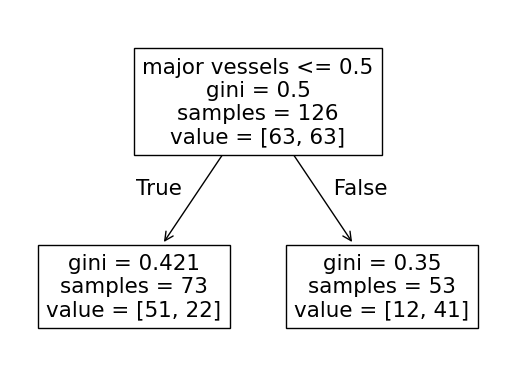

In [8]:
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=None,random_state=42)
clf=clf.fit(X_train,y_train,)

clf=clf.fit(X_train,y_train)
y_predict_train=clf.predict(X_train)
y_predict_test=clf.predict(X_test)
accuracy_train=accuracy_score(y_train,y_predict_train)
accuracy_test=accuracy_score(y_test,y_predict_test)
tree.plot_tree(clf,feature_names=getFeatures())


In [10]:
print(f'Accuracy for the training tree is {accuracy_train:.2f}\nAccuracy for the testing tree is {accuracy_test:.2f}')

Accuracy for the training tree is 0.73
Accuracy for the testing tree is 0.78


In [7]:
DT_to_PNG(clf,getFeatures(),'test_img')

## task2 Train another Decision Tree

[Text(0.56, 0.9545454545454546, 'major vessels <= 0.5\ngini = 0.5\nsamples = 126\nvalue = [63, 63]'),
 Text(0.32, 0.8636363636363636, 'Chest pain <= 3.5\ngini = 0.421\nsamples = 73\nvalue = [51, 22]'),
 Text(0.44000000000000006, 0.9090909090909092, 'True  '),
 Text(0.16, 0.7727272727272727, 'oldpeak <= 31.0\ngini = 0.142\nsamples = 39\nvalue = [36, 3]'),
 Text(0.08, 0.6818181818181818, 'resting blood pressure <= 158.0\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.04, 0.5909090909090909, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.12, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.24, 0.6818181818181818, 'Age <= 52.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.28, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.48, 0.7727272727272727, 'resting blood pressure <= 143.0\ngini = 0.493\nsamples = 34\nvalue = [15, 19]'),
 Text(0.4, 0.6818181

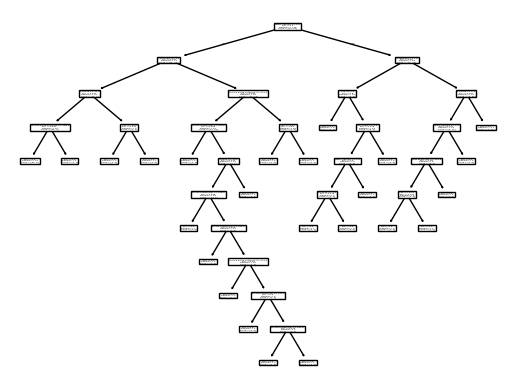

In [11]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=None,random_state=42)
clf=clf.fit(X_train,y_train)
y_predict_train=clf.predict(X_train)
y_predict_test=clf.predict(X_test)
accuracy_train=accuracy_score(y_train,y_predict_train)
accuracy_test=accuracy_score(y_test,y_predict_test)
tree.plot_tree(clf,feature_names=getFeatures())

In [13]:
print(f'Accuracy for the training tree is {accuracy_train:.2f}\nAccuracy for the testing tree is {accuracy_test:.2f}')

Accuracy for the training tree is 1.00
Accuracy for the testing tree is 0.79


In [12]:
DT_to_PNG(clf,getFeatures(),'depth_10')

## Task 3- Find the best Decision Tree

In [22]:

for depth in range(1,11):
    clf=DecisionTreeClassifier(criterion='gini',max_depth=depth,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=None,random_state=42)
    clf=clf.fit(X_train,y_train)
    DT_to_PNG(clf,getFeatures(),f'depth{depth}')

 In a depth of 1, the accuracy score for train is 0.7301587301587301 and for the test 0.7777777777777778
 In a depth of 2, the accuracy score for train is 0.7619047619047619 and for the test 0.7142857142857143
 In a depth of 3, the accuracy score for train is 0.8492063492063492 and for the test 0.8095238095238095
 In a depth of 4, the accuracy score for train is 0.9047619047619048 and for the test 0.8095238095238095
 In a depth of 5, the accuracy score for train is 0.9444444444444444 and for the test 0.8253968253968254
 In a depth of 6, the accuracy score for train is 0.9603174603174603 and for the test 0.8253968253968254
 In a depth of 7, the accuracy score for train is 0.9761904761904762 and for the test 0.7936507936507936
 In a depth of 8, the accuracy score for train is 0.9761904761904762 and for the test 0.7777777777777778
 In a depth of 9, the accuracy score for train is 0.9920634920634921 and for the test 0.8253968253968254
 In a depth of 10, the accuracy score for train is 1.0 

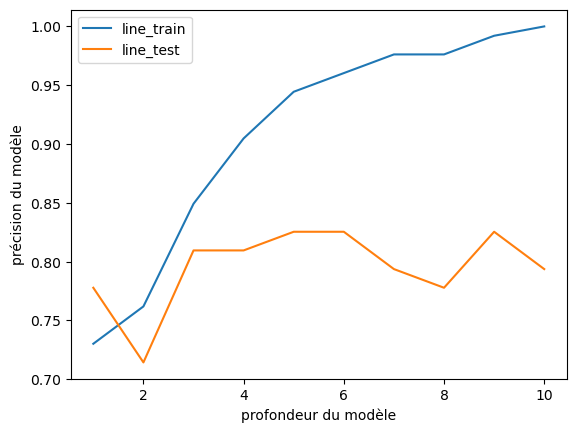

In [23]:

x=[]
y_tr=[]
y_tst=[]
for depth in range(1,11):
    clf=DecisionTreeClassifier(criterion='gini',max_depth=depth,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=None,random_state=42)
    clf=clf.fit(X_train,y_train)
    y_predict_train=clf.predict(X_train)
    y_predict_test=clf.predict(X_test)
    accuracy_train=accuracy_score(y_train,y_predict_train)
    accuracy_test=accuracy_score(y_test,y_predict_test)
    x.append(depth)
    y_tr.append(accuracy_train)
    y_tst.append(accuracy_test)
    print(f' In a depth of {depth}, the accuracy score for train is {accuracy_train} and for the test {accuracy_test}')
plt.Figure(figsize=(8,6))
plt.plot(x,y_tr,label='line_train')
plt.plot(x,y_tst,label='line_test')
plt.xlabel('profondeur du modèle')
plt.ylabel('précision du modèle')
plt.legend()
plt.show()

## Task 4 - Join the leaderboard!

In [18]:
clf_final=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=None,random_state=42)
clf_final=clf_final.fit(X_train,y_train)
generateSubmission(clf_final)
